In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

In [2]:
df = pd.read_csv(r'D:\data\NYC_airbnb\AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#I'm going to drop columns witch are not going to my machine learning models
drop_cols = ['id', 'name', 'host_id', 'host_name','latitude', 'longitude', 'calculated_host_listings_count',
            'last_review', 'neighbourhood_group']
df.drop(drop_cols, axis=1, inplace=True)
df.head()


,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Kensington,Private room,149,1,9,0.21,365
1,Midtown,Entire home/apt,225,1,45,0.38,355
2,Harlem,Private room,150,3,0,NaN,365
3,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,East Harlem,Entire home/apt,80,10,9,0.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
neighbourhood        48895 non-null object
room_type            48895 non-null object
price                48895 non-null int64
minimum_nights       48895 non-null int64
number_of_reviews    48895 non-null int64
reviews_per_month    38843 non-null float64
availability_365     48895 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.6+ MB


In [5]:
#Let's check the missing values in reviews_per_month column
df[df['reviews_per_month'].isnull()].head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
2,Harlem,Private room,150,3,0,NaN,365
19,East Harlem,Entire home/apt,190,7,0,NaN,249
26,Inwood,Private room,80,4,0,NaN,0
36,Bedford-Stuyvesant,Private room,35,60,0,NaN,365
38,Flatbush,Private room,150,1,0,NaN,365


In [6]:
#It's looks like there are missing values where number_of_reviews are 0's.
#I'm going to fill those missing values with 0's as well.
df['reviews_per_month'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
neighbourhood        48895 non-null object
room_type            48895 non-null object
price                48895 non-null int64
minimum_nights       48895 non-null int64
number_of_reviews    48895 non-null int64
reviews_per_month    48895 non-null float64
availability_365     48895 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.6+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,1.090910,1.597283,0.0,0.04,0.37,1.58,58.5
availability_365,48895.0,112.781327,131.622289,0.0,0.00,45.00,227.00,365.0


In [8]:
#Let's check availability_365 column, there are '0' values witch looks like an error.
df[df['availability_365'] == 0]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
4,East Harlem,Entire home/apt,80,10,9,0.10,0
6,Bedford-Stuyvesant,Private room,60,45,49,0.40,0
8,Upper West Side,Private room,79,2,118,0.99,0
14,West Village,Entire home/apt,120,90,27,0.22,0
20,Williamsburg,Entire home/apt,299,3,9,0.07,0
...,...,...,...,...,...,...,...
48550,Ridgewood,Private room,45,1,0,0.00,0
48731,Park Slope,Entire home/apt,111,8,0,0.00,0
48756,Murray Hill,Entire home/apt,129,2,0,0.00,0
48760,Sunnyside,Private room,46,1,0,0.00,0


In [9]:
#There are 17533 with 0's in availability_365 columns. It seems like there should be 365 instead of 0.
availability = []
for i in df['availability_365']:
    if i == 0:
        availability.append(365)
    else:
        availability.append(i)
df['availability_365'] = availability

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,1.090910,1.597283,0.0,0.04,0.37,1.58,58.5
availability_365,48895.0,243.664751,135.808749,1.0,100.00,316.00,365.00,365.0


In [11]:
df = df[df['price'] <= 200]

In [12]:
data = df.copy()
target = data.pop('price')
data.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Kensington,Private room,1,9,0.21,365
2,Harlem,Private room,3,0,0.00,365
3,Clinton Hill,Entire home/apt,1,270,4.64,194
4,East Harlem,Entire home/apt,10,9,0.10,365
5,Murray Hill,Entire home/apt,3,74,0.59,129


In [13]:
from sklearn.preprocessing import MinMaxScaler as scaler

In [14]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
data[num_cols] = scaler().fit_transform(data[num_cols])
data.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Kensington,Private room,0.000000,0.014308,0.003590,1.000000
2,Harlem,Private room,0.001601,0.000000,0.000000,1.000000
3,Clinton Hill,Entire home/apt,0.000000,0.429253,0.079316,0.530220
4,East Harlem,Entire home/apt,0.007206,0.014308,0.001709,1.000000
5,Murray Hill,Entire home/apt,0.001601,0.117647,0.010085,0.351648


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()


le.fit(data['neighbourhood'])
data['neighbourhood']=le.transform(data['neighbourhood'])

le.fit(data['room_type'])
data['room_type']=le.transform(data['room_type'])
data.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,107,1,0.000000,0.014308,0.003590,1.000000
2,93,1,0.001601,0.000000,0.000000,1.000000
3,41,0,0.000000,0.429253,0.079316,0.530220
4,61,0,0.007206,0.014308,0.001709,1.000000
5,136,0,0.001601,0.117647,0.010085,0.351648


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (30383, 6)
y_train shape (30383,)
X_test shape (10128, 6)
y_test shape (10128,)


In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions = lr.predict(X_test)

In [23]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

In [24]:
print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root Mean Squared Error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 29.44206082732313
MSE (Mean Squared Error): 1355.069052258774
RMSE (Root Mean Squared Error): 36.811262573549065
R2 score: 0.40118389554290446


In [25]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(),
                     'Predicted Values': predictions.flatten()})
error.head()

,Actual Values,Predicted Values
0,160,137.457762
1,85,86.563210
2,60,79.517542
3,85,135.753890
4,52,74.332534


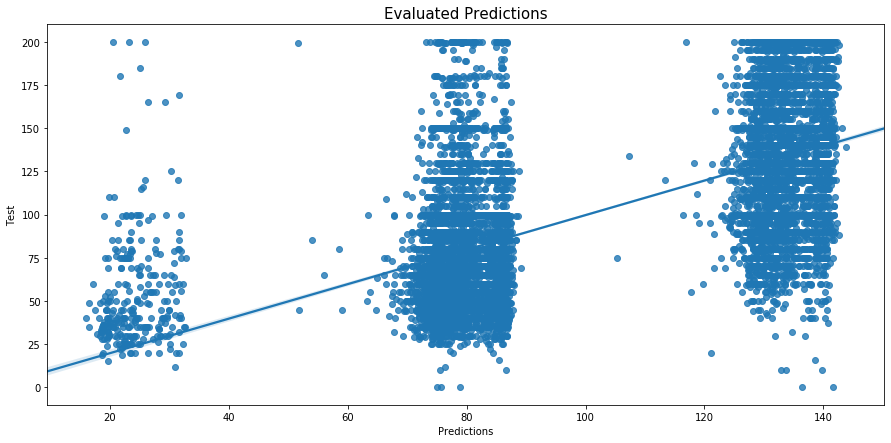

In [26]:
plt.figure(figsize=(15,7))
sns.regplot(y=y_test, x=predictions)
plt.title('Evaluated Predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
params = {
          'min_samples_split' : range(10,300,20),
          'max_depth' : range(1,16,2)}
dtr = DecisionTreeRegressor()
reg = GridSearchCV(dtr, params, cv=5, n_jobs=-1)

In [29]:
reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 2),
                         'min_samples_split': range(10, 300, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [30]:
predictions = reg.predict(X_test)

In [31]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

In [32]:
print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root Mean Squared Error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 25.341056967635286
MSE (Mean Squared Error): 1093.0975726863055
RMSE (Root Mean Squared Error): 33.06202614308908
R2 score: 0.5169512364138031


In [33]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(),
                     'Predicted Values': predictions.flatten()})
error.head()

,Actual Values,Predicted Values
0,160,128.222222
1,85,76.284091
2,60,67.907216
3,85,100.564103
4,52,61.324138


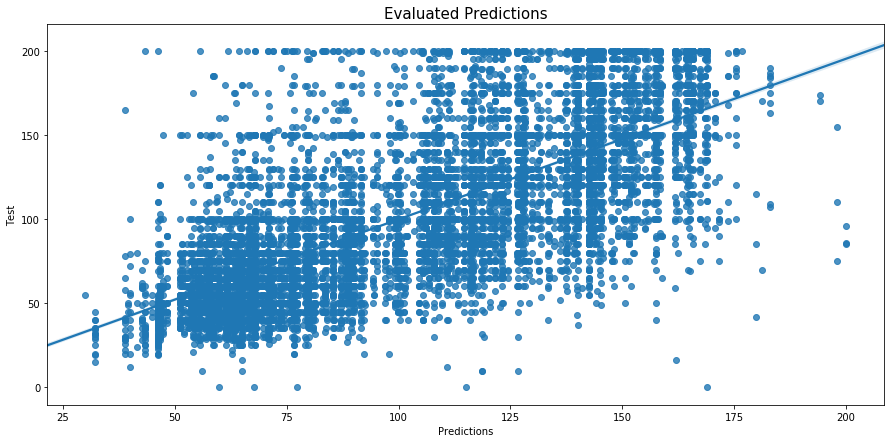

In [34]:
plt.figure(figsize=(15,7))
sns.regplot(y=y_test, x=predictions)
plt.title('Evaluated Predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')
plt.show()